# TASK #1: PROJECT OVERVIEW

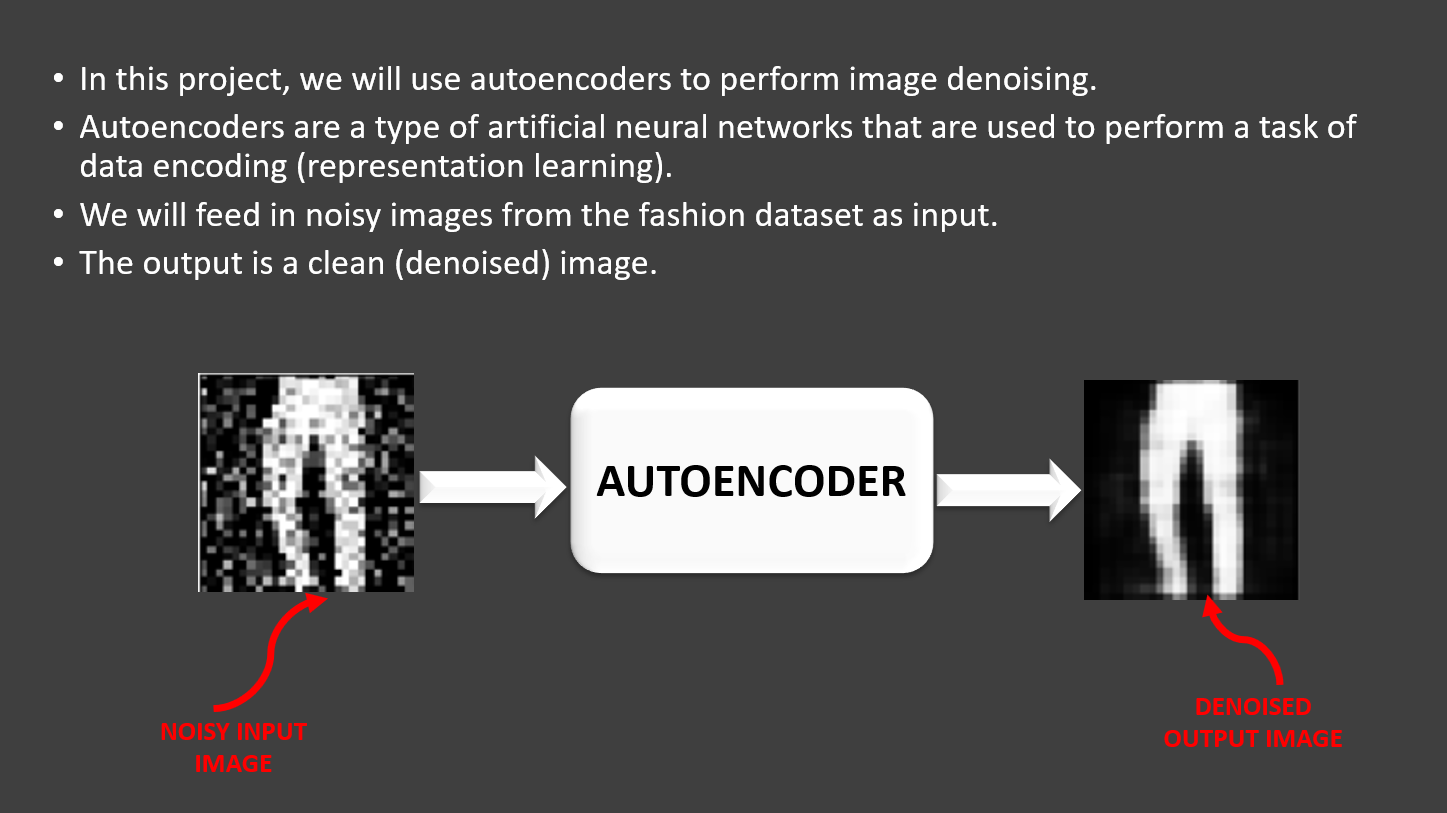

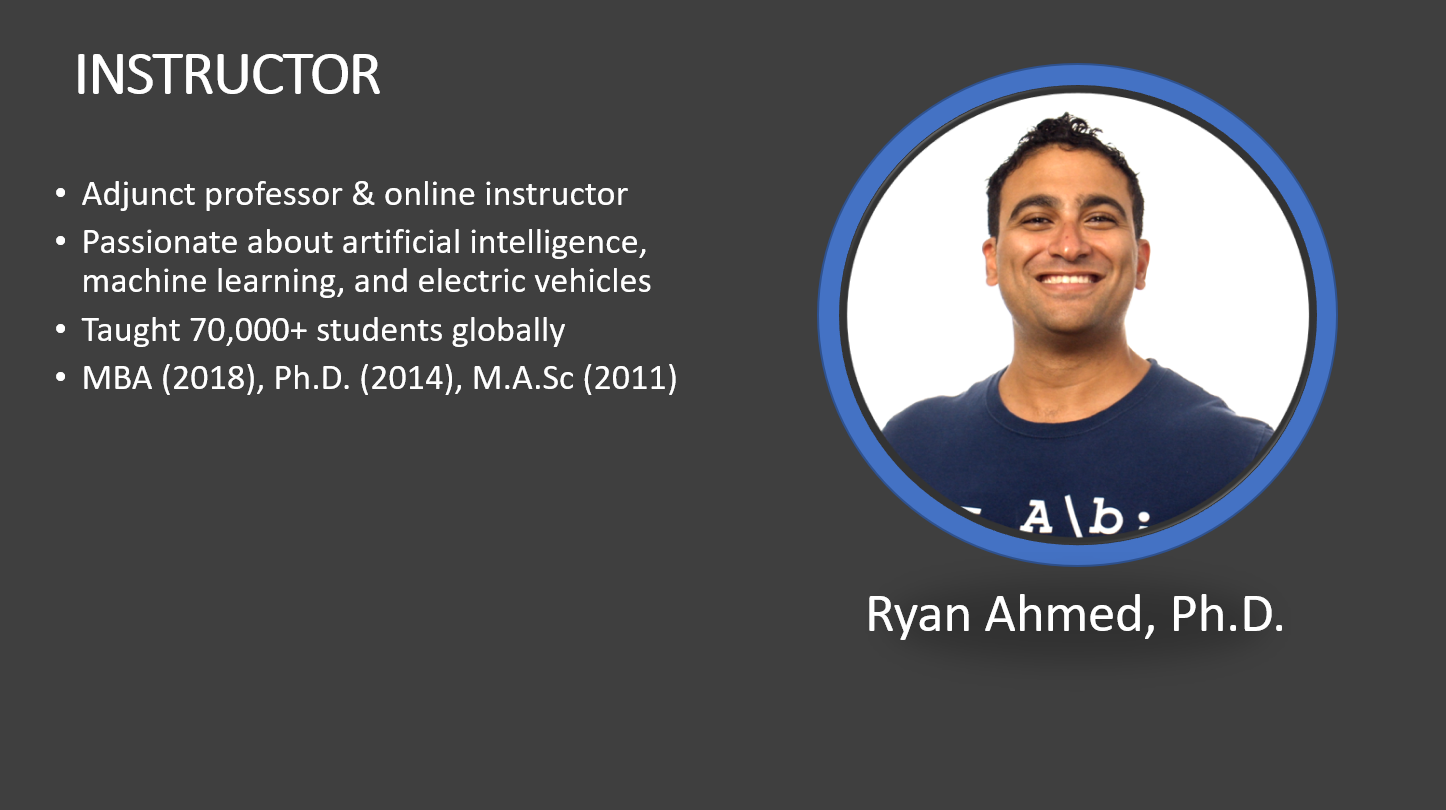

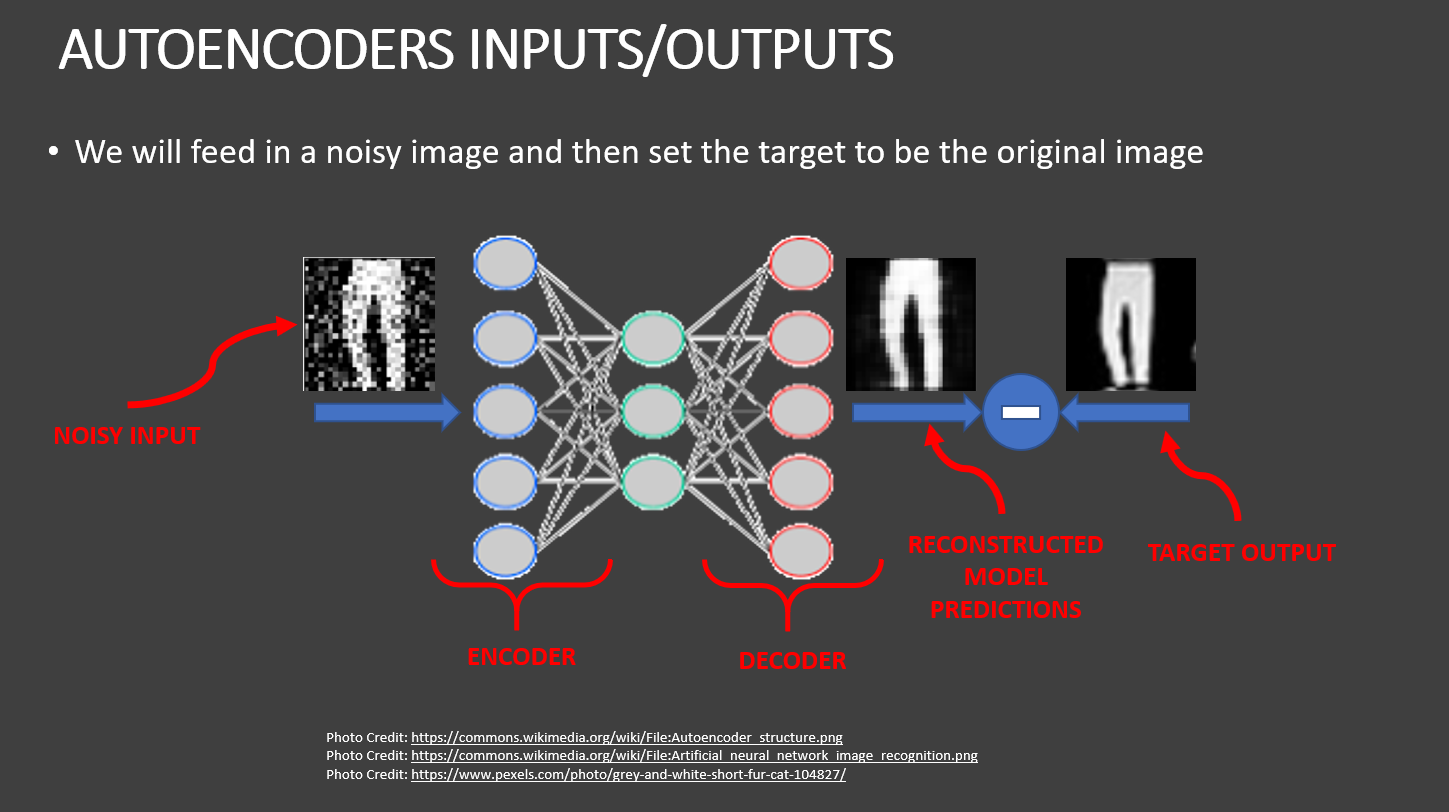

# TASK #2: IMPORT LIBRARIES AND DATASET

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
# Load dataset 
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

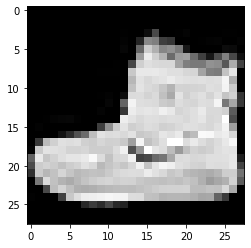

In [4]:
# Visualize a sample image
plt.imshow(X_train[0], cmap = 'gray')

In [5]:
# check out the shape of the training data
X_train.shape

(60000, 28, 28)

In [6]:
# check out the shape of the testing data
X_test.shape

(10000, 28, 28)

# TASK #3: PERFORM DATA VISUALIZATION

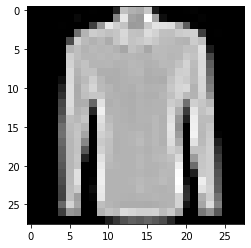

In [7]:
# Let's view some images!
index = 40
plt.imshow(X_train[index], cmap = "gray")

In [8]:
label = y_train[index]
label

6

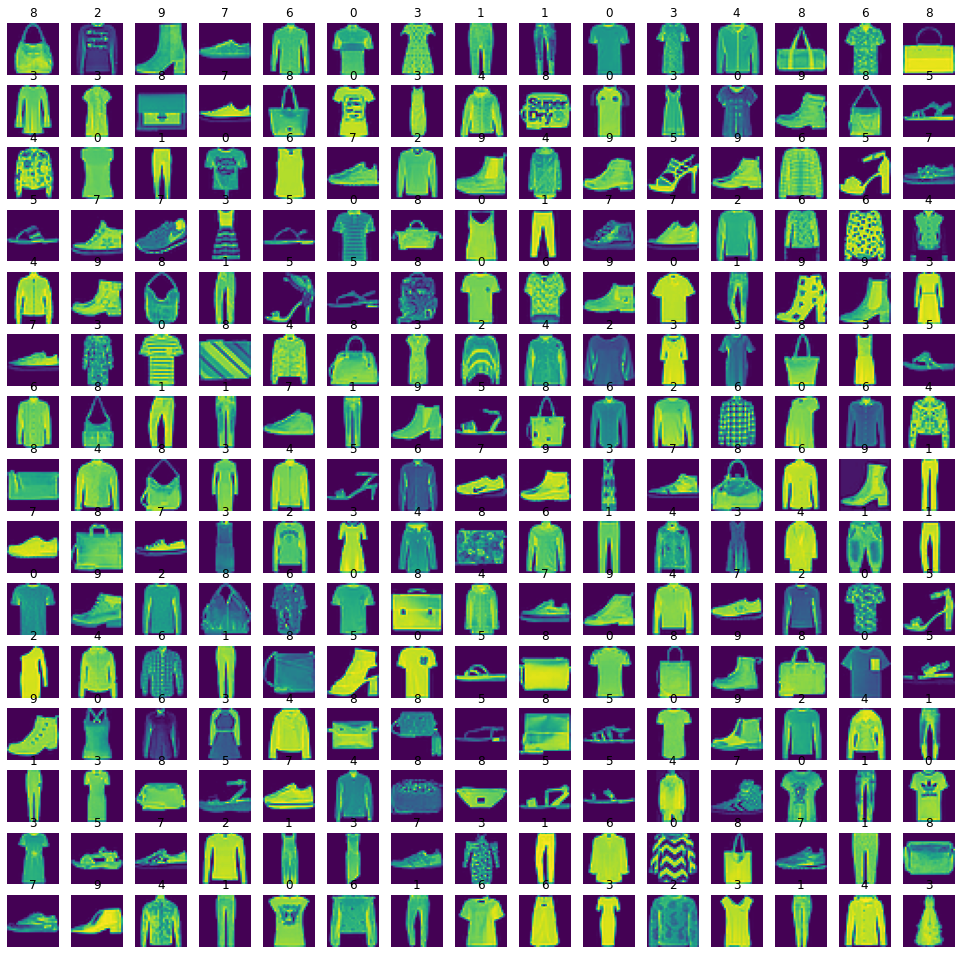

In [11]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training

for i in np.arange(0, W_grid*L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')

# TASK #4: PERFORM DATA PREPROCESSING

In [12]:
# normalize data
X_train = X_train/255
X_test = X_test/255

In [13]:
# add some noise
noise_factor = 0.3

X_train_noisy = []

for img in X_train:
    noisy_image = img + noise_factor * np.random.randn (*img.shape)
    noisy_image = np.clip(noisy_image, 0, 1)
    X_train_noisy.append(noisy_image)

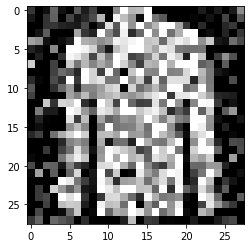

In [14]:
plt.imshow(X_train_noisy[40], cmap = "gray")

In [24]:
# add noise to testing dataset
# add some noise
noise_factor = 0.15

X_test_noisy = []

for img in X_test:
    noisy_image = img + noise_factor * np.random.randn (*img.shape)
    noisy_image = np.clip(noisy_image, 0, 1)
    X_test_noisy.append(noisy_image)

# TASK #5: UNDERSTAND THE THEORY AND INTUITION BEHIND AUTOENCODERS

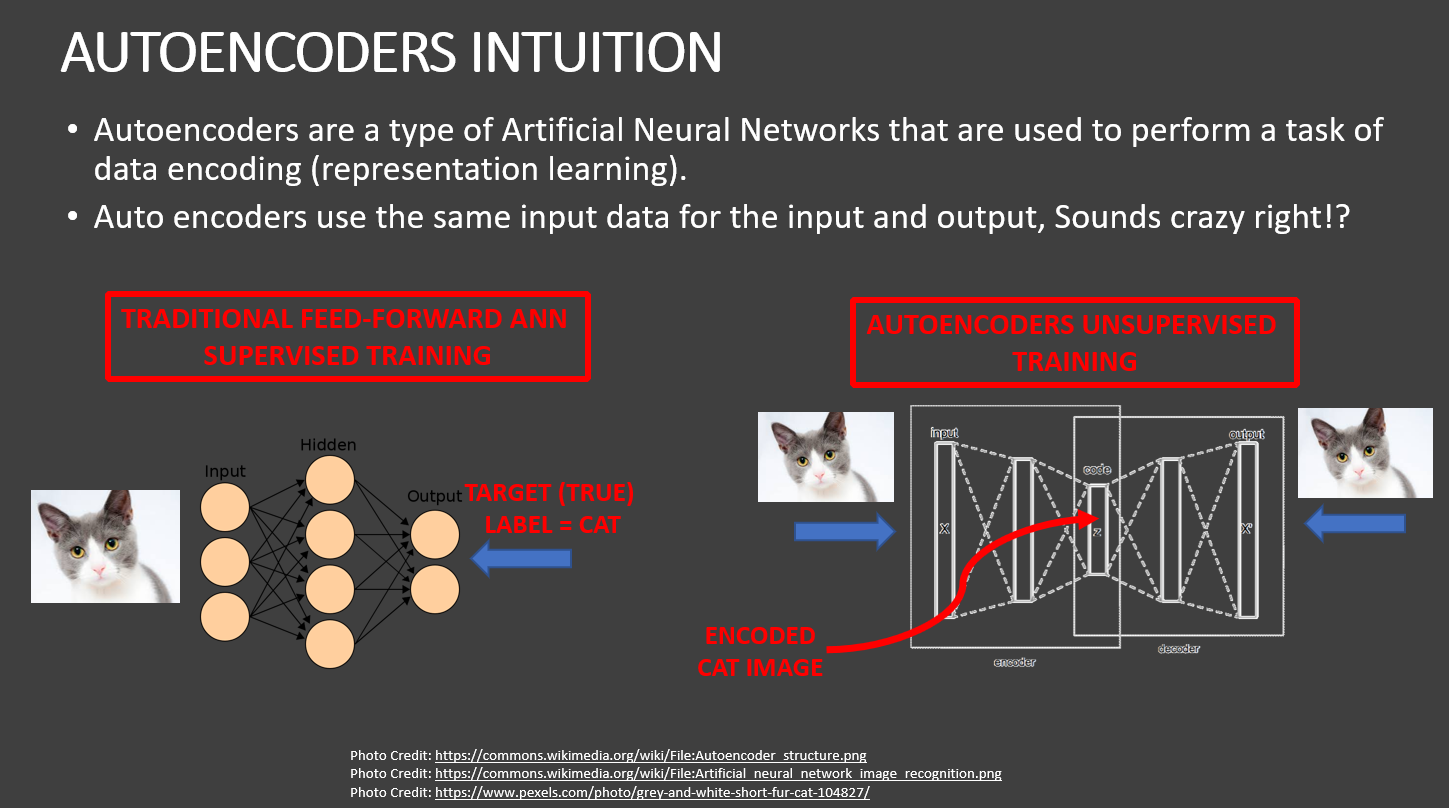

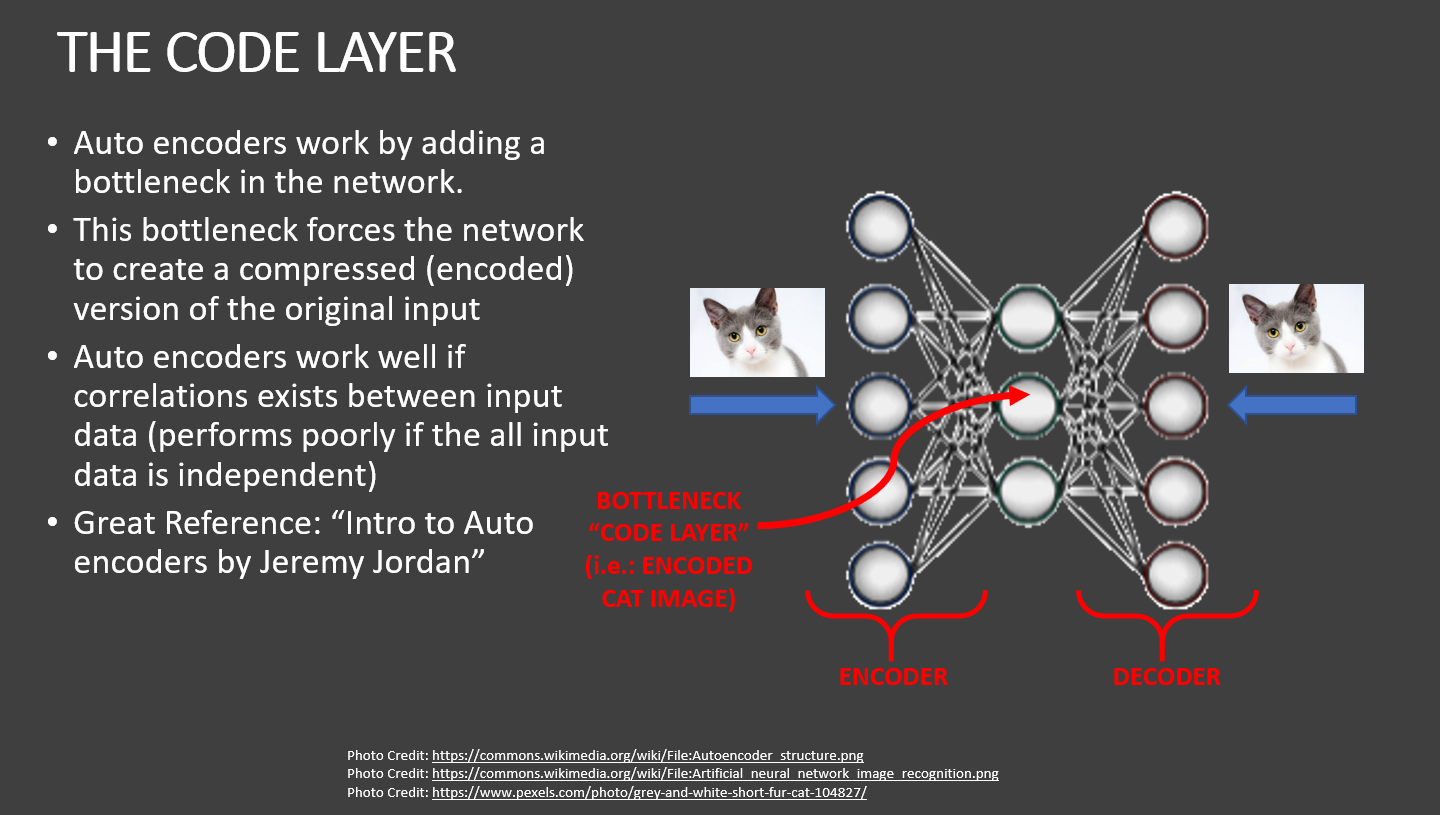

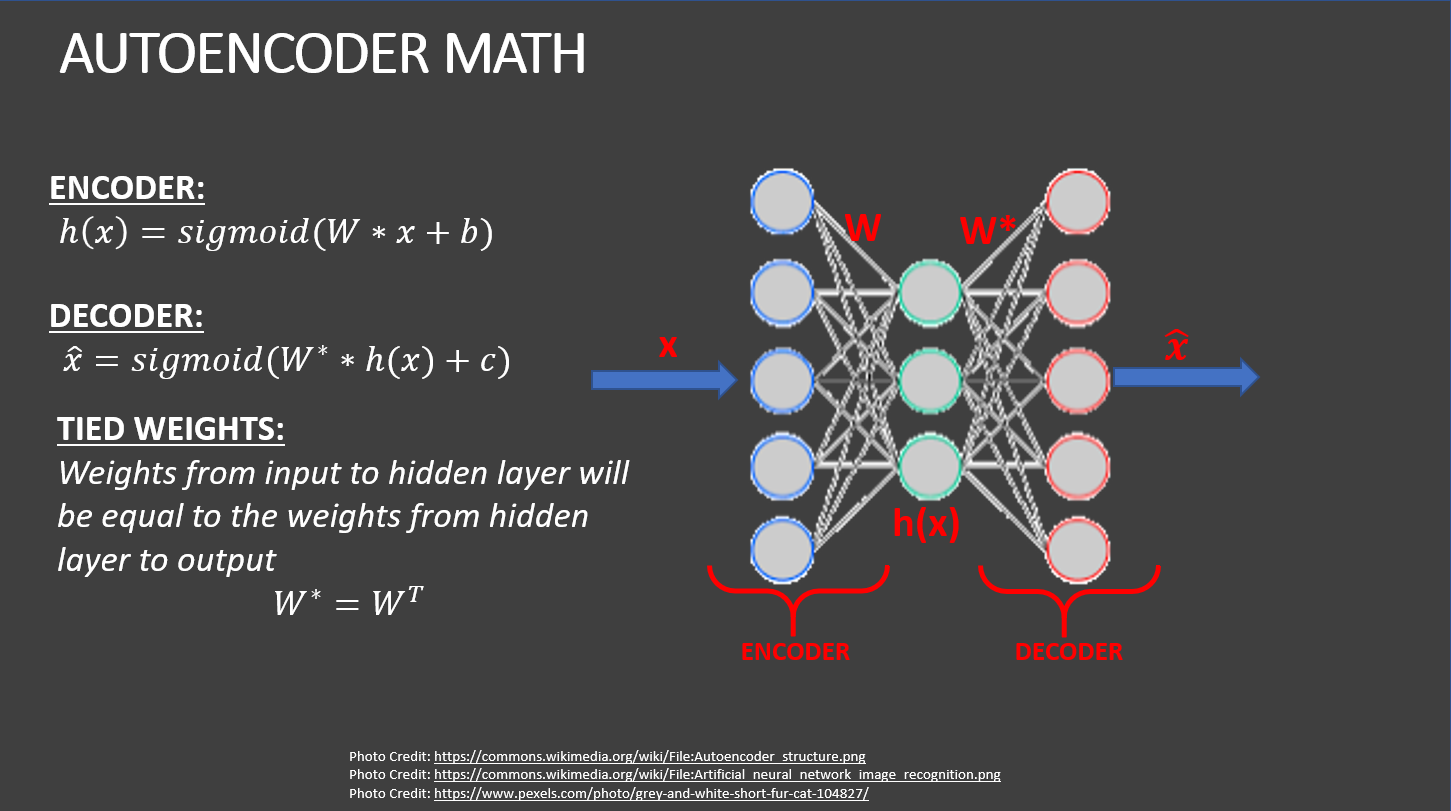

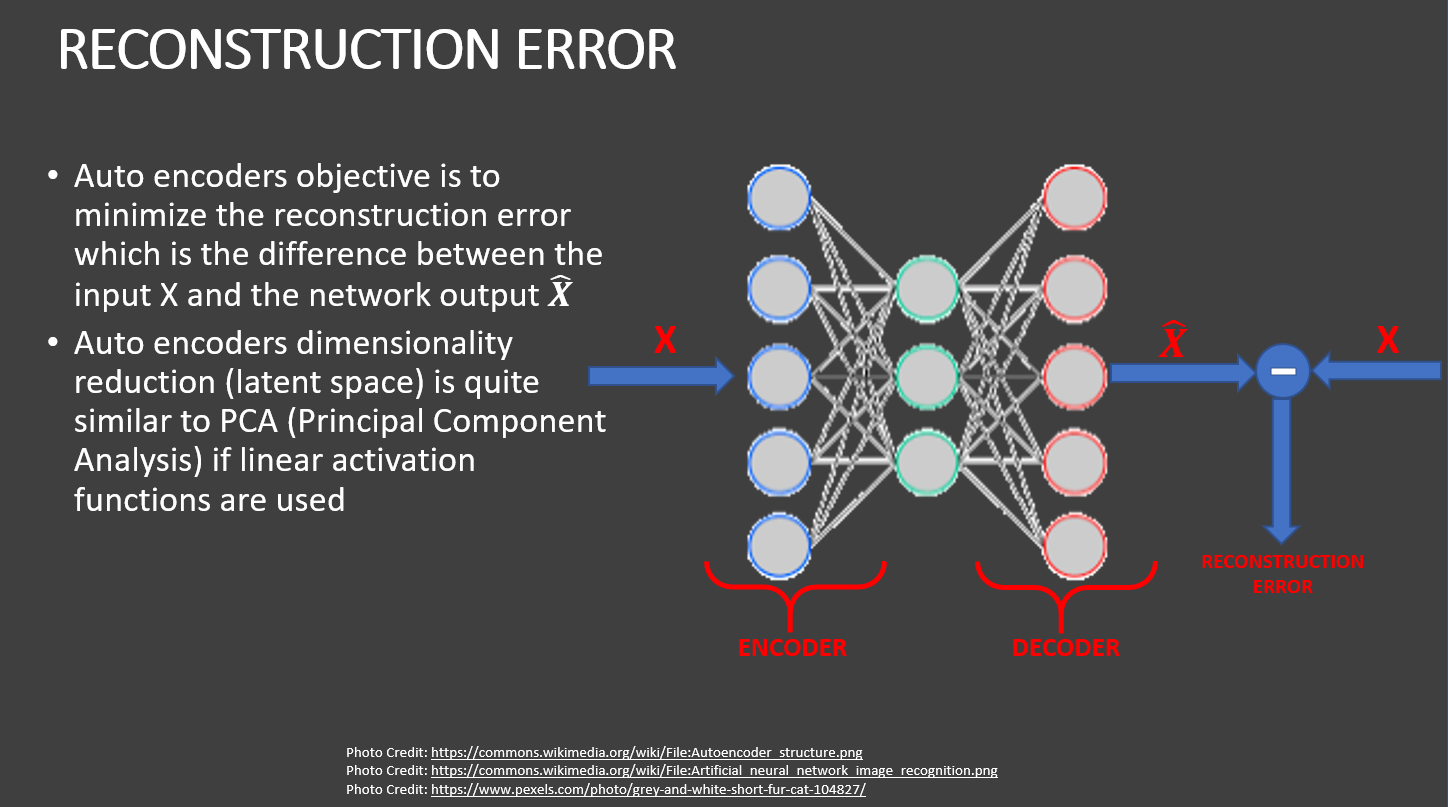

# TASK #6: BUILD AND TRAIN AUTOENCODER DEEP LEARNING MODEL

In [19]:
autoencoder = tf.keras.models.Sequential()

#Encoder
autoencoder.add(tf.keras.layers.Conv2D(filters =16, 
                                       kernel_size = 3, 
                                       strides = 2, 
                                       padding = 'same', 
                                       input_shape = (28,28,1)))
autoencoder.add(tf.keras.layers.Conv2D(filters =8, 
                                       kernel_size = 3, 
                                       strides = 2, 
                                       padding = 'same'))

autoencoder.add(tf.keras.layers.Conv2D(filters =8, 
                                       kernel_size = 3, 
                                       strides = 1, 
                                       padding = 'same'))

#Dcoder 
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters =16, 
                                       kernel_size = 3, 
                                       strides = 2, 
                                       padding = 'same'))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters =1, 
                                       kernel_size = 3, 
                                       strides = 2,
                                       activation = 'sigmoid',
                                       padding = 'same'))

In [20]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [25]:
X_train_noisy = np.array(X_train_noisy)
X_test_noisy = np.array(X_test_noisy)

In [26]:
autoencoder.fit(X_train_noisy.reshape(-1, 28, 28, 1),
               X_train.reshape(-1, 28, 28, 1),
               epochs = 10,
               batch_size = 200,
               validation_data = (X_test_noisy.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1)))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 38s 635us/sample - loss: 0.4002 - val_loss: 0.3261
Epoch 2/10
60000/60000 [==============================] - 32s 527us/sample - loss: 0.3213 - val_loss: 0.3103
Epoch 3/10
60000/60000 [==============================] - 32s 533us/sample - loss: 0.3129 - val_loss: 0.3045
Epoch 4/10
60000/60000 [==============================] - 33s 548us/sample - loss: 0.3094 - val_loss: 0.3006
Epoch 5/10
60000/60000 [==============================] - 34s 559us/sample - loss: 0.3071 - val_loss: 0.2984A: 1s 
Epoch 6/10
60000/60000 [==============================] - 32s 537us/sample - loss: 0.3055 - val_loss: 0.2973
Epoch 7/10
60000/60000 [==============================] - 32s 530us/sample - loss: 0.3042 - val_loss: 0.2956
Epoch 8/10
60000/60000 [==============================] - 32s 542us/sample - loss: 0.3033 - val_loss: 0.2939
Epoch 9/10
60000/60000 [==============================] - 35s 583us/samp

# TASK #7: EVALUATE TRAINED MODEL PERFORMANCE

In [31]:
accuracy = 1 - (autoencoder.evaluate(X_test_noisy.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1)))
print(f"Test accuracy: {accuracy}")

10000/10000 [==============================] - 3s 349us/sample - loss: 0.2925
Test accuracy: 0.7074930390357972


In [32]:
predicted = autoencoder.predict(X_test_noisy[:10].reshape(-1, 28, 28, 1))

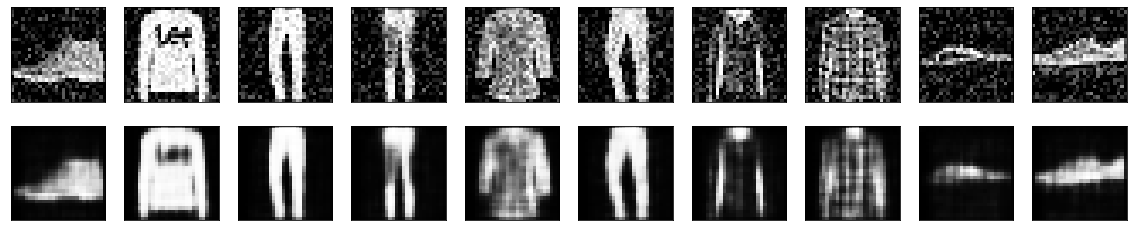

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([X_test_noisy[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

# EXCELLENT WORK!

- 0 = T-shirt/top
- 1 = Trouser
- 2 = Pullover
- 3 = Dress
- 4 = Coat
- 5 = Sandal
- 6 = Shirt
- 7 = Sneaker
- 8 = Bag
- 9 = Ankle boot